In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

In [3]:
data_train_path = 'C:/Users/Admin/OneDrive - DATANOVELTECH PRIVATE LIMITED/Desktop/Project folders/image_classification_project/Fruits_Vegetables/train'
data_test_path = 'C:/Users/Admin/OneDrive - DATANOVELTECH PRIVATE LIMITED/Desktop/Project folders/image_classification_project/Fruits_Vegetables/test'
data_val_path = 'C:/Users/Admin/OneDrive - DATANOVELTECH PRIVATE LIMITED/Desktop/Project folders/image_classification_project/Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height =180 

In [7]:
data_test_path

'C:/Users/Admin/OneDrive - DATANOVELTECH PRIVATE LIMITED/Desktop/Project folders/image_classification_project/Fruits_Vegetables/test'

In [9]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [11]:
data_cat = data_train.class_names

In [13]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [15]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


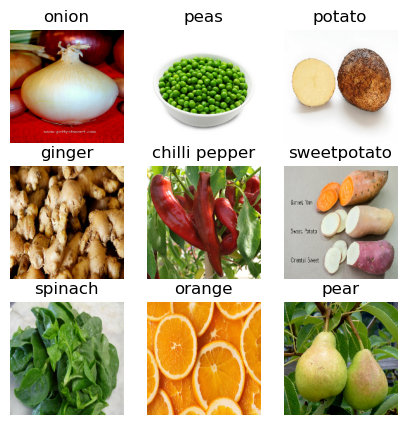

In [25]:
plt.figure(figsize=(5,5))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [27]:
from tensorflow.keras.models import Sequential

In [29]:
model = Sequential([
    layers.Rescaling(1./255),
    
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.2),
    
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [33]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/2
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 423ms/step - accuracy: 0.0720 - loss: 3.8821 - val_accuracy: 0.3504 - val_loss: 2.2376
Epoch 2/2
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 378ms/step - accuracy: 0.2810 - loss: 2.5074 - val_accuracy: 0.5014 - val_loss: 1.5751


Text(0.5, 1.0, 'Loss')

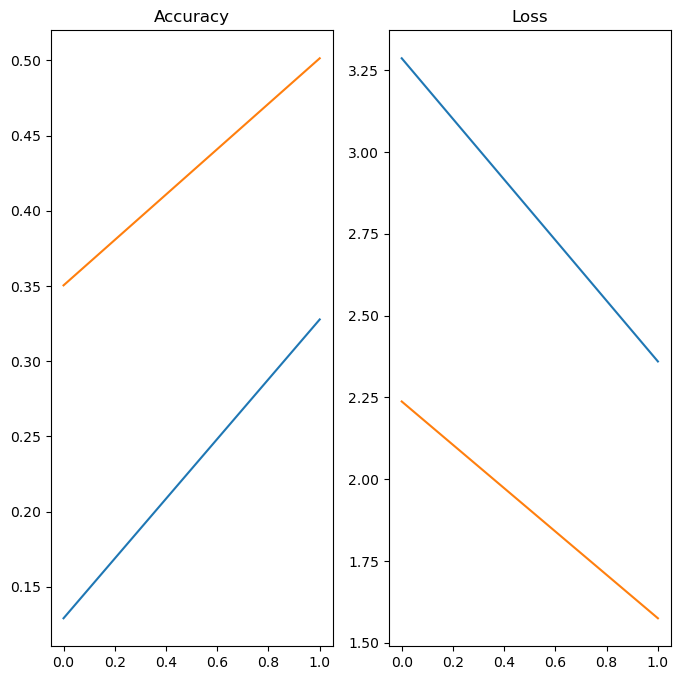

In [35]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [37]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [39]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [41]:
score = tf.nn.softmax(predict)

In [43]:
print('Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Fruit in image is apple with accuracy of 61.16


In [37]:
model.save('Image_classify.keras')# file name is image

In [45]:
import streamlit as st